# modern NLP 의 흐름에 올라타보자

## 변화의 흐름 - Word Embedding 과 Context

우리는 NLP task 를 풀기 위하여 인간의 언어를 컴퓨터의 언어로 바꾸어 주는 작업을 반드시 거쳐야만 합니다. (임베딩)  
단어가 가지고 있는 의미를 숫자에 녹여내기 위해서 tf-idf, word2vec, fasttext 등 다양한 임베딩 방법들을 공부해 보기도 했지요.  
우리가 기존에 배웠던 임베딩 방식은 워드임베딩(Word Embedding)이라고 합니다. 즉, 단어 하나하나를 임베딩하는 방식이지요.

그런데..

생긴 것은 똑같이 생겼는데 다른 뜻을 가지고 있는 단어들(동음이의어, 다의어 등)은 어떻게 표현될지? 생각해 본 적 있나요?

예시: 차
- 시간이 늦었으니 커피 말고 차나 한 잔 마시자
- 제주도는 버스로 움직이기 힘들어. 차가 있어야 해.
- 축구공을 이쪽으로 차.

똑똑한 여러분은 '문맥을 고려하는 임베딩(Contextual Embedding)을 만들면 되지 않나?!'라고 생각하실 겁니다.

바로 앞으로 등장하는 모델들은 이러한 문맥(context) 을 잘 반영하는 모델들입니다.

## Transfer Learning과 Language Modeling

### Transfer Learning (전이 학습)

자연어에서의 전이 학습은 언제, 어디서 사용되는 것일까요?

### Language Modeling(언어 모델)

자연어 처리에서의 전이 학습은 보통 language model(언어 모델)과 관련이 깊습니다.

언어 모델은 
- 입력으로 주어진 시퀀스의 다음을 학습하는 과정에서 주어진 시퀀스가 얼마나 자연스러운지를 학습하게 됩니다. 
- 즉, 언어 모델은 철수가 밥을 마셨다인지 철수가 밥을 먹었다인지를 데이터로부터 학습을 하게 됩니다. 이렇게 학습을 완료한 언 어모델은 언어의 패턴과 규칙을 학습하여 전반적인 언어의 특징을 익히게 됩니다.

자연어 처리에서 바로 이 언어 모델이 pretrained model이 되는 것입니다. 
- 이미 언어의 전반적인 것을 아는 신경망에게 언어와 관련된 문제를 풀게 하는 것이지요. 
- 이처럼 주어진 문제(다운스트림 테스크 혹은 downstream task)를 잘 풀기 위해 pretrained model을 재학습시키는 것을 fine-tuning이라고 부릅니다.

### Transformer

사실 최근 NLP의 가장 큰 흐름은 트랜스포머라고 해도 무방하다고 생각합니다. 

GPT, BERT 등 이후에 만들어지는 모델들은 트랜스포머가 기반이기 때문이죠.

또한, BERT를 시작으로 BERT를 개선하는 수많은 모델들이 나오기 시작했습니다. 성능 또한 향상되었구요!

따라서 modern NLP라고 하면 Transformer를 빼놓을 수 없답니다!

## ELMO(Embedding from Language Models)

ELMo는 문맥(context)을 반영한 임베딩을 pretrained model로 구현한 첫 번째 사례입니다.  
언어 모델을 이용하여 임베딩을 한 것인데요. 이름에 포함된 LM이 바로 이 언어 모델을 가리키죠.

### ELMo 의 구조

ELMo 는 세 가지 요소로 구성되어 있습니다.
- character-level CNN
- bidirectional LSTM
- ELMo 레이어

## GPT(Generative Pre-Training Transformer)

GPT는 트랜스포머의 decoder 구조만을 이용하여 만든 네트워크입니다.  
트랜스포머의 decoder를 아주 깊고 깊게 쌓아 많은 데이터를 학습 시켜 성능을 높힌 네트워크죠

### GPT 의 구조

'Decoder만을 이용했다는 게 뭐야?'🤔

Decoder는 masked Multi-Head Attention, Multi-Head Attention, Feed Forward Neural Network로 이루어져 있었습니다. 바로 이 구조를 차용하여 Decoder block를 많이 쌓아 올리면?!

따란- GPT가 되는 것이죠.

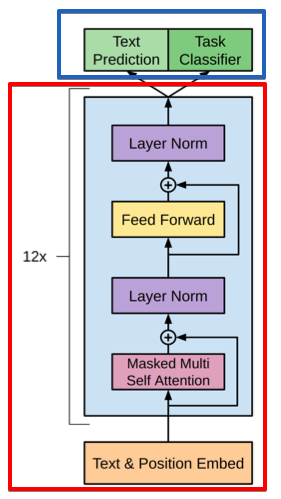

In [1]:
from IPython.display import Image
Image(filename='capture/19_gpt.png') 

### Embedding

GPT는 텍스트의 Embedding으로 BPE(Byte-pair Encoding) 를 사용하고 있어요.

BPE는 모든 단어를 문자(바이트)들의 집합으로 취급하여 자주 등장하는 문자 쌍을 합치는 subword tokenization이었죠! 처음 보는 단어일지라도 문자(알파벳)들의 조합으로 나타내어 OOV 문제를 해결할 수 있다는 장점이 있었습니다.

기존 트랜스포머와 마찬가지로 position encoding(포지션 인코딩)도 함께 사용한답니다.

### Masked Multi-Head Attention

Masked Multi-Head Attention은 모든 것을 병렬적으로 처리하는 트랜스포머에게 자기회귀적(Autoregressive)인 특성을 부여하기 위해 만든 장치입니다.

여기서 자기회귀적이라 함은 훈련 단계에서 디코더에게 정답 문장을 매 스텝 단위로 단어 하나씩 알려주고 그다음 단어를 예측(Next Token Prediction)하게 하는 형태로 학습되는 형태라는 뜻이죠.

이는 마치 sequence-to-sequence 모델에서 디코더가 번역 문장을 생성할 때 time-step을 하나하나 거치듯이 만들어주는 것입니다.

순차처리 방식의 RNN과 달리 정답 문장의 모든 단어를 한꺼번에 입력받는 트랜스포머의 decoder는 학습할 때 현재 자기보다 미래에 생성될 토큰을 보지 못하도록 masking이 필요하게 됩니다.

'어!? 근데 그렇게 생겼다면 어디서 본 것 같은데?!'🤔 라고 생각하신 분 계신가요?

사실 위에서부터 언급했듯이, 이 구조는 저희가 열심히 공부했던 언어 모델과 같은 구조입니다. 

다시 한번 되짚어 보자면, 언어 모델은 비지도 학습을 통해 문장의 자연스러운 순서를 학습하게 됩니다.  
그래서 GPT는 문자 생성에 매우 특화되어 있답니다. 

pretrain이 끝나게 되면 GPT는 downstream task에 맞게 finetuning을 하게 됩니다. 바로 파란색 박스 부분에 해당되는 부분이죠.  
여기서 우리는 기존에 봐왔던 모델들과 조금 다른 점을 발견할 수 있습니다. 바로 두 개의 Objective가 존재하는 것이죠.

말 그대로 모델이 두 가지의 문제를 동시에 푸는 겁니다.  
text prediction과 text classification이 각각 다른 모델들을 이용하여 output을 만들어내는 것이 아니라 한 모델에서 동시에 output을 내는 겁니다.

그렇다면 GPT의 모델 부분을 코드로 한 번 확인해 볼까요?.  
전체 코드를 한 번에 보면 복잡해 보일 수도 있겠지만, TFGPT2MainLayer라는 전체 모델 클래스 안에서 TFBlock 레이어 클래스를 반복해서 사용하고 있는 부분을 눈여겨 봐주세요. TFBlock 클래스 안에서 TFAttention, TFMLP 레이어가 사용되는 구조가 위에서 소개한 GPT의 모델 구조 그림에 표현되어 있습니다.

모델이 한 개인데 어떻게 classification, entailment 등등 다양한 문제를 풀 수 있을까요?

바로 <b>input을 변형시켜서</b> 입니다.

예를 들어 classification task를 풀기 위해 finetuning을 하게 된다면 `<start> <input text> <extract> <class>` 이렇게 구성된 데이터셋을 학습시키면 되는 것이죠. GPT는 이 데이터셋에 맞추어서 weight들을 조정하게 될 것입니다.

#### GPT vs. GPT2

원리는 똑같아요. GPT의 모델 구조를 그대로 사용하면서 파라미터 사이즈를 10배 정도 키우고 성능을 개선시킨 모델이 바로 GPT2입니다.

#### GPT3

2020년 6월 GPT3가 공개되었습니다. GPT1의 1000배, GPT2의 100 배 이상의 파라미터를 갖췄고, 성능도 크게 향상되었습니다. 

GPT3가 할 수 있는 작업에는 언어 관련 문제 풀이, 랜덤 글짓기, 간단한 사칙 연산, 번역, 간단한 웹 코딩, 문장 교정 등이 있었습니다.

#### GPT Neo

GPT3를 복제한 GPT-Neo라는 모델이 EleutherAI라는 비영리 오픈 소스 연구 단체에서 오픈 소스로 공개되었습니다.  
모델 뿐 아니라 대규모 데이터과 사전학습된 모델도 공개되었죠. 

최근에는 60억 개의 파라미터를 가진 GPT-J-6B를 공개하기도 하였습니다.  
GPT3보다 작은 파라미터를 가지고 있지만 GPT3와 유사한 수준의 파라미터 수를 갖는 모델인 GPT-NeoX을 만들고 있다고 하니 기대해 보아도 좋을 것 같습니다.

https://github.com/EleutherAI/gpt-neo 참고